# Multivariate Normal Distribution

# Sampling from a Multivariate Normal Distribution and Maximum Likelihood Estimation

# Evaluating the Normaility of the Univariate Marginal Distributions

# 1. Q-Q plot

Write a Python code to draw a normal Q-Q plot for **univariate variables**.

### - Algorithm to get Q-Q plot
1) Order the original observations to get $x_{(1)}, x_{(2)}, ...,x_{(n)}$ <br>
2) Calculate probability values $\frac{(j -1/2)}{n}, j=1,2,...,n$ <br>
3) Calculate the standard normal quantiles $q_{(1)}, q_{(2)}, ...,q_{(n)}$ <br>
4) Plot the paris of observations $(q_{(1)},x_{(1)}),(q_{(2)},x_{(2)}),...,(q_{(n)},x_{(n)})$ 

### - Checking the straightness of Q-Q plot
: Use correlation coefficient 
<br>
: Hypothesis testing 
<br>
$H_{0}: \rho =  0 \;\;  vs. H_{a}: \rho \neq 0$ 
<br>
$T = \frac{r\sqrt{n-2}}{\sqrt{1-r^{2}}} \sim t_{n-2} \;\; under \;H_{0}$

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
def qqplot(data, plot_title):
    # step1: order the original observations
    df = sorted(data)
    n = len(df)
    # step 2: calculate the probability values
    j = list(range(1,(n+1)))
    p = (np.asarray(j) - 0.5) /n
    # step 3: calculate the standard normal quantiles
    q = norm.ppf(p)
    # step 4: plot the pairs of observations
    plt.scatter(q,df)
    plt.title("Q-Q plot of %s" %str(plot_title))
    plt.ylabel('Sample Quantile')
    plt.xlabel('Quantile of Normal distribution')
    
    # checking the straightness of Q-Q plot
    line_fitter = LinearRegression()
    line_fitter.fit(q.reshape(-1,1),df)
    plt.plot(q,line_fitter.predict(q.reshape(-1,1)), 'red')
    plt.show()

### check with the in-built function

In [3]:
#import random
dummy = np.random.randn(10)
dummy

array([ 0.36981184,  0.38869067,  0.94199972, -2.46356037, -1.95622576,
       -2.40858286, -0.05771185, -0.16796667, -1.25838773, -0.04077925])

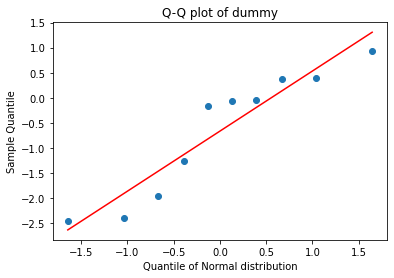

In [4]:
qqplot(dummy,'dummy')

<function matplotlib.pyplot.show(close=None, block=None)>

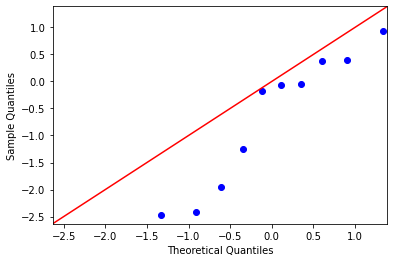

In [5]:
import statsmodels.api as sm
import pylab as py
  
sm.qqplot(dummy, line ='45')
py.show

same result! (might seem a little bit different because of the scale)

# 2. Box-Cox transformation

A morning newspaper lists the following used-car prices for a foreign compact with age $x_{1}$ measured in years and selling price $x_{2}$ measured in thousands of dollars:

$x_{1}$: 3 5 5 7 7 7 8 9 10 11 <br>
$x_{2}$: 2.3 1.9 1.0 0.7 0.3 1.0 1.05 0.45 0.7 0.3

Using the data, <br>

## a. Determine a Box-Cox transformation for $x_{1}$ using Python function

In [6]:
x1 = np.array([3, 5, 5, 7, 7, 7, 8, 9, 10, 11])
x2 = np.array([2.3, 1.9, 1.0, 0.7, 0.3, 1.0, 1.05, 0.45, 0.7, 0.3])

In [7]:
x1_fitted_data, x1_fitted_lambda = stats.boxcox(x1)

In [8]:
x1_fitted_data

array([1.99357154, 3.97994271, 3.97994271, 5.96225561, 5.96225561,
       5.96225561, 6.95229389, 7.9417156 , 8.93058988, 9.91897192])

Lambda value used for Transformation: 0.9950293497559268


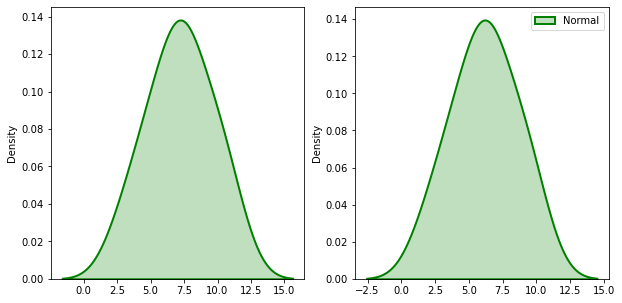

In [9]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(x1, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(x1_fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {x1_fitted_lambda}")

It seems that the original data already follows the normal distribution. ($\because \lambda \approx 1$) <br>
Thus, the box-cox transformation has a negligible effect on the data

## b. Determine a Box-Cox transformation for $x_{2}$ using Python function. 

In [10]:
x2_fitted_data, x2_fitted_lambda = stats.boxcox(x2)

In [11]:
print(x2)
print(x2_fitted_data)

[2.3  1.9  1.   0.7  0.3  1.   1.05 0.45 0.7  0.3 ]
[ 0.83302984  0.64192557  0.         -0.35665281 -1.20372064  0.
  0.04879058 -0.79839677 -0.35665281 -1.20372064]


Lambda value used for Transformation: 0.0003479744696430567


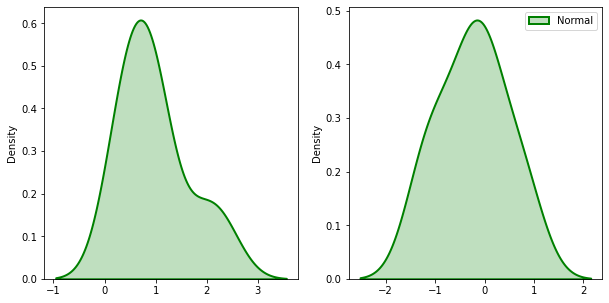

In [12]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(x2, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(x2_fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {x2_fitted_lambda}")

The data was converted into a normal distribution or rather close to a normal distribution using the box-cox transformation. ($\because \lambda \approx 0.0003$)

## c. Construct Q-Q plots for $x_{1}$ and $x_{2}$, respectively, using Python code in #1.

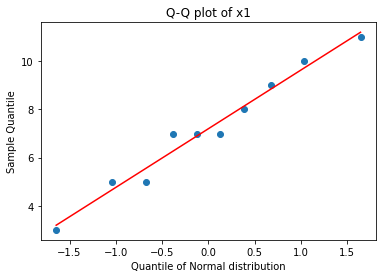

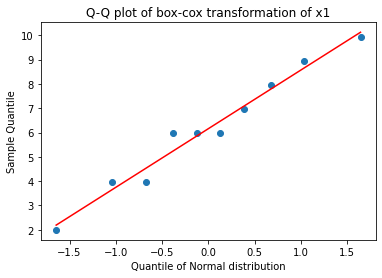

In [13]:
qqplot(x1,'x1')
qqplot(x1_fitted_data,'box-cox transformation of x1')

As we have checked from above, $x_{1}$ does not show much difference with the data using the box-cox transformation because it already follows the normal distribution.

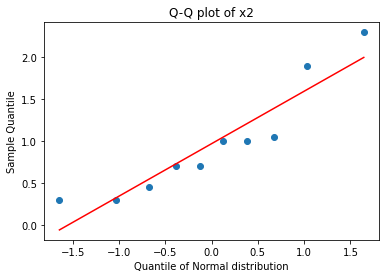

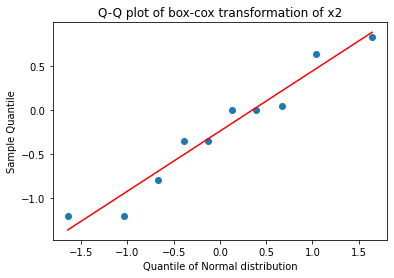

In [14]:
qqplot(x2,'x2')
qqplot(x2_fitted_data,'box-cox transformation of x2')

However,  for $x_{2}$, the data points are closer to the line after the box-cox transformation. <br>
This indicates that the transformation has imporved the approximation to normality for the data.

# Evaluating Bivariate Normality

# Chi-Square Plot (Gamma Plot)
Write a Python code to draw a chi-square plot for **multivariate variables**. 

### Algorithm to get Chi-Square Plot (Gamma Plot)
$d_{(1)}^{2}, d_{(2)}^{2}, .. d_{(n)}^{2}$ should behave like $\chi_{2}^{2}$ random variables.<br>
<br>(The algorithm is similar to the Q-Q plot)
1) Order the squared distances, $d_{(1)}^{2}\le d_{(2)}^{2}\le ... \le d_{(n)}^{2}$  <br>
2) Calculate probability values $\frac{(j -1/2)}{n}, j=1,2,...,n$ <br>
3) Calculate quantiles of $\chi_{2}^{2}$ distribution $q_{(1)}, q_{(2)}, ...,q_{(n)}$ <br>
4) Plot the pairs of observations $(q_{(j)}, d_{(j)}^{2}), j =1,2,...,n, \; where \; q_{(j)}=\chi_{2}^{2} \left( \frac{(j -1/2)}{n} \right)$ 

$\underline{Recall}$: Squared Generalized Distances  <br>
If $\vec{y} \sim N_{p}(\vec{\mu},\Sigma)$, then $(\vec{y}-\vec{\mu})' \Sigma^{-1}(\vec{y}-\vec{\mu}) \sim \chi_{p}^{2}$ <br>
$(\vec{x_{j}}-\vec{\bar{x}})' S^{-1}(\vec{x_{j}}-\vec{\bar{x}}), \; j=1,2,...,n$ for bivariate cases.

In [15]:
from numpy.linalg import inv
from scipy.stats import chi2

In [16]:
def cqplot(df):
    ''' calculate the confidence interval for correlation between two input variables.
    Parameters
    ----------
    df : input dataframe
    var1, var2, var3 : input variables
    plot_title : describes what variables were used for the chi-square plot
      
    Returns
    -------
    chi-square plot
    '''
    # step1: order the squared distances
    ## calculate the squared distances
    x = df.copy()
    m = df.mean()
    s = df.cov()
    s_inv = np.linalg.inv(s)
    d = np.zeros(len(df))
    for i in range(len(df)):
        d[i] = (x.iloc[i,]-m).dot(s_inv).dot(x.iloc[i,]-m)
    order = sorted(d)

    # step 2: calculate the probability values
    n = len(df)
    j = list(range(1,(n+1)))
    p = (np.asarray(j) - 0.5) /n

    # step 3: calculate the quantiles of the chi-square distribution
    order_d= np.asarray(order).reshape(-1,1)
    q = chi2.ppf(p, df = len(x.columns))
    # step 4: plot the pairs of observations
    plt.scatter(q,order_d)
    plt.title("Chi-square plot for the %s variables" %str(df.columns.to_list()))
    plt.ylabel('Sample Quantile')
    plt.xlabel('Quantile of Chi-Square distribution')
    
     # checking the straightness of the Chi-Square plot
    line_fitter = LinearRegression()
    line_fitter.fit(q.reshape(-1,1),order_d)
    plt.plot(q,line_fitter.predict(q.reshape(-1,1)), 'red')
    
    plt.show()

In [17]:
# test with dummy data
dummy2 = np.random.randn(30).reshape(10,3)
dummy2 =pd.DataFrame(dummy)
dummy2.head()

,0
0,0.369812
1,0.388691
2,0.942000
3,-2.463560
4,-1.956226


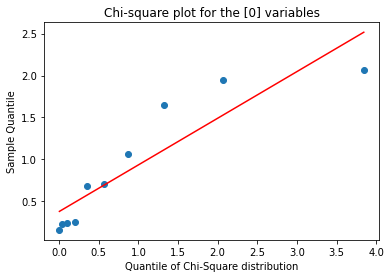

In [18]:
cqplot(dummy2)

### check with the in-built function

In [19]:
x = dummy2.copy()
m = x.mean()
s = x.cov()
s_inv = np.linalg.inv(s)
d = np.zeros(len(dummy2))
for i in range(len(dummy2)):
    d[i] = (x.iloc[i,]-m).dot(s_inv).dot(x.iloc[i,]-m)

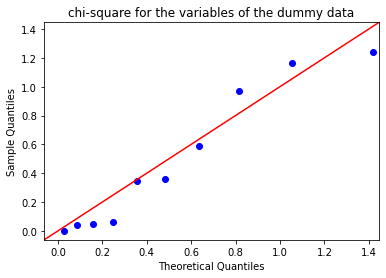

In [20]:
sm.qqplot(d, stats.chi, distargs=(2,), fit=True, line="45")
plt.title("chi-square for the variables of the dummy data")
plt.show()

same result!

# Interpret the multivariate normality via  $\chi^2$ Plot
Using the data ‘college.dat’ (described in Table 5.2 of the textbook), construct a chi-square plot using Python code in #3. Comment on the multivariate normality of the three variables.

In [21]:
college = pd.read_csv('college.dat',header = None, delim_whitespace=True)
college.rename(columns={0: 'Social Science & History',1:'Verbal',2:'Science'},inplace=True)
college.head()

,Social Science & History,Verbal,Science
0,468,41,26
1,428,39,26
2,514,53,21
3,547,67,33
4,614,61,27


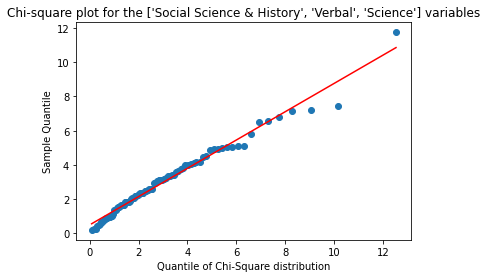

In [22]:
cqplot(college)

Overall, the data points seem to align with the straight line, especially in the lower parts of the quantiles. However, this does not necessarily mean that it gurantees normailty. Let's focus on the right end of the straight line. The points at the right end are not falling on a straight line but indeed are scattered significantly from the positions. Thus, we can not conclude a complete normality. One way to improve this skewness is to implement a proper box-cox transformation. 